<a href="https://colab.research.google.com/github/MorningStarTM/brain_cancer_detection/blob/main/brain_cancer_detection_using_vgg_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Brain cancer detection using VGG-16

In [21]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics import confusion_matrix
from keras_preprocessing.image import img_to_array

In [22]:
train = "/content/drive/MyDrive/DataSet/brain_cancer/Training"
test = "/content/drive/MyDrive/DataSet/brain_cancer/Testing"

In [24]:
#call the model
vgg16_model = VGG16()

In [25]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
#add layer of vgg16 model except last layer to our sequential model
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [28]:
#set layers non-trainable
for layer in model.layers:
  layer.trainable = False

In [29]:
#classes of image
folders = glob("/content/drive/MyDrive/DataSet/brain_cancer/Training/*")

In [30]:
#add last layer to our model
model.add(Dense(len(folders), activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [32]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

##Preparing image dataset

In [33]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [34]:
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

In [35]:
train_set = train_datagen.flow_from_directory(train, target_size=(224,224), batch_size=16, classes=classes, class_mode="categorical")

Found 5732 images belonging to 4 classes.


In [36]:
test_set = test_datagen.flow_from_directory(test, target_size=(224,224), batch_size=16, classes=classes, class_mode="categorical")

Found 780 images belonging to 4 classes.


In [37]:
imgs, labels = next(train_set)

In [38]:
def PlotImg(img_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(img_arr, axes):
    ax.imshow(img)
    ax.axis('off')

  plt.tight_layout()
  plt.show()

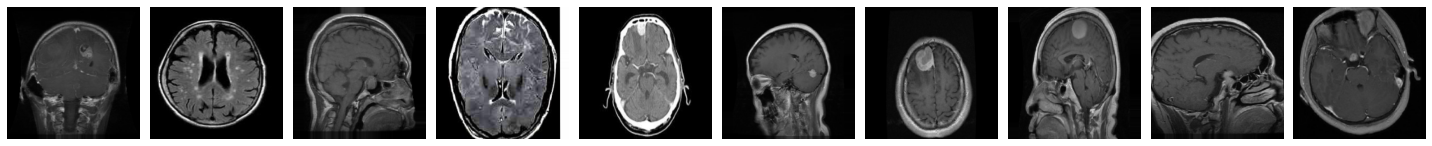

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [39]:
PlotImg(imgs)
print(labels)

##Train the model

In [ ]:
r = model.fit(x=train_set, validation_data=test_set, epochs=20, verbose=2)

Epoch 1/20
